<a href="https://colab.research.google.com/github/Vivek-Joshi17/CNN_neural_network/blob/main/House_price_Pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import tensorflow as tf
import plotly.express as px
import pandas as pd
import numpy as np


#Load the dataset

In [62]:
train_data_set=pd.read_csv('train.csv')
train_data_set

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [63]:
train_data_set=train_data_set.drop('Id',axis=1)
train_data_set

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [64]:
train_data_set.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [65]:
train_data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [66]:
print(train_data_set['SalePrice'].describe())
px.histogram(train_data_set,x='SalePrice')

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


In [67]:
import plotly.figure_factory as ff

fig=ff.create_distplot(hist_data=[train_data_set.SalePrice.values.tolist()],group_labels=['Saleprice distribution'],bin_size=100)
fig.show()

In [68]:
fig.show()

# Working with columns with numerical values

In [69]:
train_data_set_num=train_data_set.select_dtypes(include=['float64','int64'])
train_data_set_num

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,366,0,112,0,0,0,0,4,2010,142125


In [70]:
px.histogram(train_data_set_num,nbins=100,marginal='box',barmode='group')

In [71]:
for columns in train_data_set_num:
  fig = px.histogram(train_data_set_num,x=columns,nbins=70,title=f'Histogram for {columns}')
  fig.show()

In [86]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
import pandas as pd

# Assuming train_data_set_num is a DataFrame containing numerical columns
# Replace NaN values with the mean of each column
x_train = train_data_set_num.drop('SalePrice', axis=1)
y_train = train_data_set_num['SalePrice']

# Instantiate a SimpleImputer to replace NaN values with the mean
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform the data
x_train_imputed = pd.DataFrame(imputer.fit_transform(x_train), columns=x_train.columns)

# Print the shape of the data before and after imputation
print("Shape before imputation:", x_train.shape)
print("Shape after imputation:", x_train_imputed.shape)

# Now, create the column transformer with MinMaxScaler
ct = make_column_transformer(
    (MinMaxScaler(), x_train_imputed.columns.tolist())
)
ct.fit(x_train_imputed)

# Transform the data using MinMaxScaler
x_train_normal = ct.transform(x_train_imputed)


Shape before imputation: (1460, 36)
Shape after imputation: (1460, 36)


In [81]:
y_train.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: SalePrice
Non-Null Count  Dtype
--------------  -----
1460 non-null   int64
dtypes: int64(1)
memory usage: 11.5 KB


In [84]:
x_train_normal=pd.DataFrame(x_train_normal)

In [85]:
x_train_normal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 36 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1460 non-null   float64
 1   1       1201 non-null   float64
 2   2       1460 non-null   float64
 3   3       1460 non-null   float64
 4   4       1460 non-null   float64
 5   5       1460 non-null   float64
 6   6       1460 non-null   float64
 7   7       1452 non-null   float64
 8   8       1460 non-null   float64
 9   9       1460 non-null   float64
 10  10      1460 non-null   float64
 11  11      1460 non-null   float64
 12  12      1460 non-null   float64
 13  13      1460 non-null   float64
 14  14      1460 non-null   float64
 15  15      1460 non-null   float64
 16  16      1460 non-null   float64
 17  17      1460 non-null   float64
 18  18      1460 non-null   float64
 19  19      1460 non-null   float64
 20  20      1460 non-null   float64
 21  21      1460 non-null   float64
 22  

In [75]:
x_train_normal.shape

(1460, 36)

In [87]:
model_1=tf.keras.Sequential([
    tf.keras.layers.Dense(64),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(),
                metrics=['mae'])
history = model_1.fit(x_train_normal,y_train,epochs=100)

Epoch 1/100
46/46 [==============================] - 1s 2ms/step - loss: 179604.7656 - mae: 179604.7656
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 88454.8047 - mae: 88454.8047
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 34206.3945 - mae: 34206.3945
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 31767.5039 - mae: 31767.5039
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 29674.9297 - mae: 29674.9297
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 27998.8320 - mae: 27998.8320
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 26864.8496 - mae: 26864.8496
Epoch 8/100
46/46 [==============================] - 0s 2ms/step - loss: 25752.2539 - mae: 25752.2539
Epoch 9/100
46/46 [==============================] - 0s 2ms/step - loss: 25007.0410 - mae: 25007.0410
Epoch 10/100
46/46 [==============================] - 0s 2ms/step - loss: 24333.

Text(0.5, 0, 'epochs')

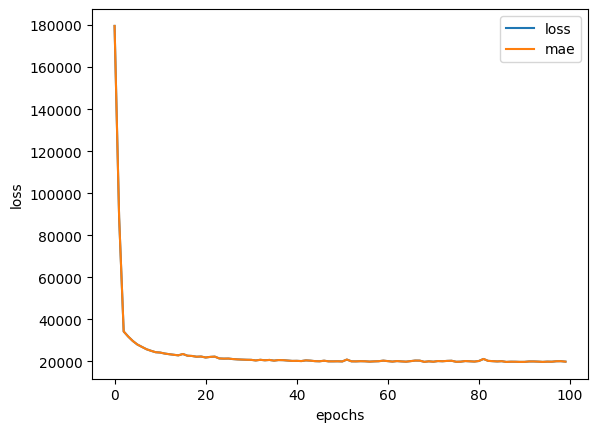

In [88]:
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

In [100]:
test=pd.read_csv('test.csv')
test=test.drop('Id',axis=1)
test

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [101]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          107 non-null    object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

In [102]:
temp_df = test['SalePrice']

KeyError: 'SalePrice'

In [93]:
test_data_num = test.select_dtypes('int64','float64')
test_data_num

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,2ndFlrSF,LowQualFinSF,...,Fireplaces,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1461,20,11622,5,6,1961,1961,896,0,0,...,0,140,0,0,0,120,0,0,6,2010
1,1462,20,14267,6,6,1958,1958,1329,0,0,...,0,393,36,0,0,0,0,12500,6,2010
2,1463,60,13830,5,5,1997,1998,928,701,0,...,1,212,34,0,0,0,0,0,3,2010
3,1464,60,9978,6,6,1998,1998,926,678,0,...,1,360,36,0,0,0,0,0,6,2010
4,1465,120,5005,8,5,1992,1992,1280,0,0,...,0,0,82,0,0,144,0,0,1,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,1936,4,7,1970,1970,546,546,0,...,0,0,0,0,0,0,0,0,6,2006
1455,2916,160,1894,4,5,1970,1970,546,546,0,...,0,0,24,0,0,0,0,0,4,2006
1456,2917,20,20000,5,7,1960,1996,1224,0,0,...,1,474,0,0,0,0,0,0,9,2006
1457,2918,85,10441,5,5,1992,1992,970,0,0,...,0,80,32,0,0,0,0,700,7,2006


In [96]:
test_data_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Id             1459 non-null   int64
 1   MSSubClass     1459 non-null   int64
 2   LotArea        1459 non-null   int64
 3   OverallQual    1459 non-null   int64
 4   OverallCond    1459 non-null   int64
 5   YearBuilt      1459 non-null   int64
 6   YearRemodAdd   1459 non-null   int64
 7   1stFlrSF       1459 non-null   int64
 8   2ndFlrSF       1459 non-null   int64
 9   LowQualFinSF   1459 non-null   int64
 10  GrLivArea      1459 non-null   int64
 11  FullBath       1459 non-null   int64
 12  HalfBath       1459 non-null   int64
 13  BedroomAbvGr   1459 non-null   int64
 14  KitchenAbvGr   1459 non-null   int64
 15  TotRmsAbvGrd   1459 non-null   int64
 16  Fireplaces     1459 non-null   int64
 17  WoodDeckSF     1459 non-null   int64
 18  OpenPorchSF    1459 non-null   int64
 19  Enclos

In [95]:
x_test = test_data_num.drop('SalePrice',axis=1)
y_test = test_data_num['SalePrice']

imputer = SimpleImputer(strategy='mean')

x_test_imputer =pd.DataFrame(imputer.fit_transform(x_test),xolumns=x_test.columns)

print("shape before imputation:",x_test.shape)
print("shape after imputation:",x_test_imputer.shape)

ct = make_column_transformer(
    (MinMaxScaler(),x_test_imputer.columns.tolist())
)
ct.fit(x_test_imputer)

x_test_normal= ct.transformer(x_test_imputer)

KeyError: "['SalePrice'] not found in axis"

**Cann't evaluate because our test data do not have "SalePrice" Column**